In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet
import numpy as np
import os

In [2]:
# Load file
file_path = 'clean_for_graph.xlsx'
df_graph_data = pd.read_excel(file_path)
df_graph_data.head()

,Year,Total Megawatthours
0,2013,8131928
1,2014,8253766
2,2015,8246405
3,2016,8280309
4,2017,8246161


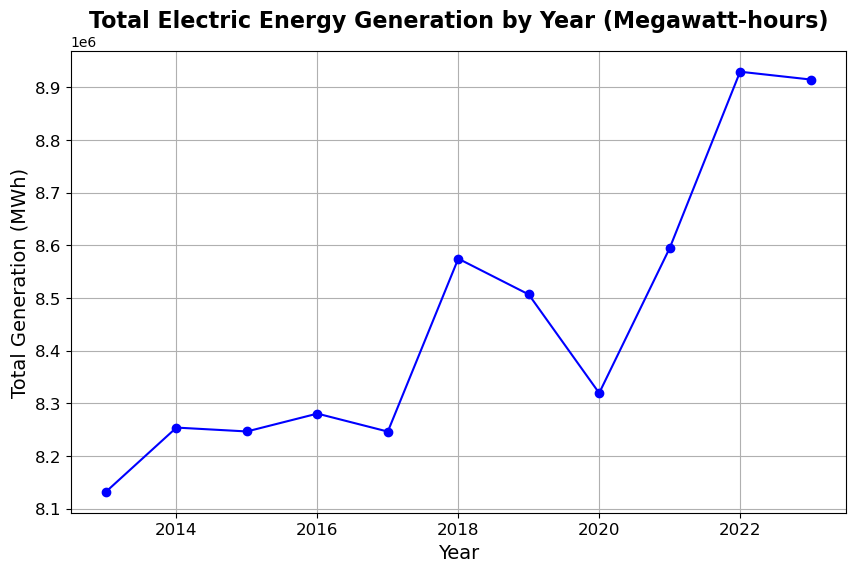

In [11]:
#Plot
plt.figure(figsize=(10,6))
plt.plot(df_graph_data['Year'], df_graph_data['Total Megawatthours'], marker='o', linestyle='-', color='blue')
plt.title('Total Electric Energy Generation by Year (Megawatt-hours)', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Total Generation (MWh)', fontsize=14)
plt.grid(True)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

19:37:19 - cmdstanpy - INFO - Chain [1] start processing
19:37:19 - cmdstanpy - INFO - Chain [1] done processing


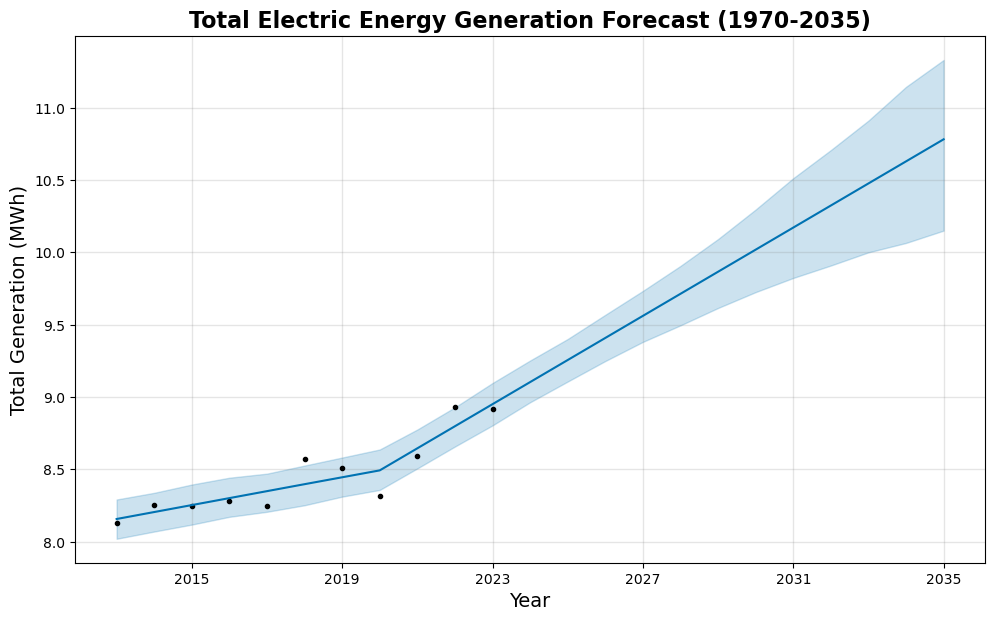

In [12]:
# Prepare the data for Prophet
df_prophet = df_graph_data[['Year', 'Total Megawatthours']].rename(columns={'Year': 'ds', 'Total Megawatthours': 'y'})

# Scale the 'Total Megawatthours' column by dividing by 1e6 to shift decimal points from 0.8 to 8.0
df_prophet['y'] = df_prophet['y'] / 1e6

# Convert the 'Year' column to a datetime format for Prophet
df_prophet['ds'] = pd.to_datetime(df_prophet['ds'], format='%Y')

# Initialize the Prophet model
model = Prophet(yearly_seasonality=False, changepoint_prior_scale=0.1, interval_width=0.85)  # Adjust interval_width here
model.fit(df_prophet)

# Make future predictions
future = model.make_future_dataframe(periods=2035 - df_prophet['ds'].dt.year.max(), freq='YE')
forecast = model.predict(future)

# Plot the forecast
fig = model.plot(forecast)

# Set axis labels with correct formatting
plt.title('Total Electric Energy Generation Forecast (1970-2035)', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Total Generation (MWh)', fontsize=14)

# Display the plot
plt.show()